In [2]:
import peachbox
import os
import sys
import pandas as pd

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Set file system to local fs
dwh = peachbox.DWH.Instance()
dwh.fs = peachbox.fs.Local()
dwh.fs.dwh_path = '/peachbox/tutorial/dwh'

In [4]:
from model.master import ReviewProperties
from model.master import ProductReviewEdge

In [5]:
properties = dwh.query_by_key_range(ReviewProperties, 0, sys.maxint)
edges      = dwh.query_by_key_range(ProductReviewEdge, 0, sys.maxint)

In [6]:
reviews = properties.join(edges, properties.review_id==edges.review_id)

In [7]:
reviews.count()

2004327

In [8]:
reviews = reviews.select(properties.true_as_of_seconds, properties.review_id, edges.product_id, properties.score)

In [9]:
df = reviews.sample(withReplacement=False, fraction=0.02, seed=23456743).toPandas()

In [10]:
df['dt'] = pd.DatetimeIndex(df.true_as_of_seconds.index.asi8*10**9, tz='utc')

In [11]:
df = df.set_index(['dt'])

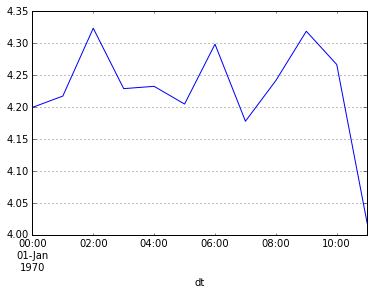

In [12]:
df.resample(rule='H', how='mean')['score'].plot()

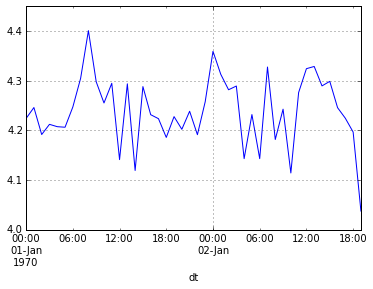

In [50]:
df.set_index(df.true_as_of_seconds, inplace=True)

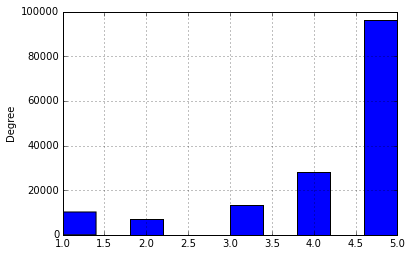

In [58]:
df['score'].plot(kind='hist')


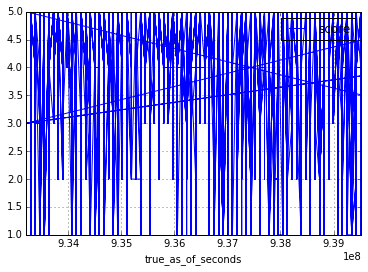

In [60]:
df.plot(x='true_as_of_seconds', y='score')

In [61]:
df.resample(rule='24H', how='mean')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [44]:
from pandas import DataFrame, Series, date_range
from numpy.random import randn

ts = Series(randn(1000), index=date_range('1/1/2000', periods=1000))
df = DataFrame(randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [48]:
df[['A', 'B']]

,A,B
2000-01-01,1.825962,1.070211
2000-01-02,-1.126900,-0.188802
2000-01-03,-0.258645,-1.221278
2000-01-04,-1.974738,0.938918
2000-01-05,-0.347867,-0.799689
2000-01-06,-0.646391,1.045414
2000-01-07,-0.275156,-0.890946
2000-01-08,0.382261,0.828393
2000-01-09,-1.054366,-0.634346
2000-01-10,-1.295251,1.050727


In [15]:
df['true_as_of_seconds', 'score']

KeyError: ('true_as_of_seconds', 'score')

In [44]:
df = review_properties.select(review_properties.true_as_of_seconds, review_properties.review_id, review_properties.score)

In [45]:
df = df.sample(withReplacement=False, fraction=0.1, seed=123)

In [46]:
df.toPandas()

,true_as_of_seconds,review_id,score
0,917913600,-2600336279372338185,2
1,917913600,-8175042436849817347,5
2,917913600,3481681297748525525,1
3,917827200,7904525732352158752,1
4,917827200,6442035898524375729,5
5,917827200,6082400955578135980,5
6,917827200,-5579300508597845766,1
7,917827200,5401097562041064047,5
8,917827200,-5753811221665761566,5
9,917913600,-3382595694255690775,5


In [19]:
print user_properties.toPandas()

NameError: name 'user_properties' is not defined

In [20]:
import matplotlib.pyplot as plt

ImportError: No module named matplotlib.pyplot

In [30]:
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *

udf = UserDefinedFunction(lambda x: x+'_new', StringType())
new_column = udf(user_properties.profile_name)

In [14]:
new_df = user_properties.withColumn('gender', new_column)

In [15]:
import pandas
print new_df.toPandas()[['profile_name','gender']]

                                profile_name  \
0      Charles Culbertson (cculbert@cfw.com)   
1      Charles Culbertson (cculbert@cfw.com)   
2      Charles Culbertson (cculbert@cfw.com)   
3      Charles Culbertson (cculbert@cfw.com)   
4                             jhbsci@aol.com   
5      Charles Culbertson (cculbert@cfw.com)   
6      Charles Culbertson (cculbert@cfw.com)   
7      Charles Culbertson (cculbert@cfw.com)   
8      Charles Culbertson (cculbert@cfw.com)   
9      Charles Culbertson (cculbert@cfw.com)   
10                             "shelle-chan"   
11     Charles Culbertson (cculbert@cfw.com)   
12     Charles Culbertson (cculbert@cfw.com)   
13                             "shelle-chan"   
14     Charles Culbertson (cculbert@cfw.com)   
15     Charles Culbertson (cculbert@cfw.com)   
16                   LadyJustice@prodigy.net   
17                   LadyJustice@prodigy.net   
18                   LadyJustice@prodigy.net   
19                   LadyJustice@prodigy

In [22]:
new_df[['user_id', 'gender']]

DataFrame[user_id: string, gender: string]

In [17]:
import peachbox
hbase = peachbox.HbaseDriver()
hbase.connection().tables()

['test', 'test_table']

In [18]:
t = hbase.connection().table('test_table')
print list(t.scan())

[('123', {'f1:u1': 'r2'}), ('1234', {'f1:u1': 'r2', 'f1:r1': 'r3'})]


In [19]:
for (k,v) in t.scan():
    print k
    print type(v)

123
<type 'dict'>
1234
<type 'dict'>


In [27]:
reviews = new_df[['true_as_of_seconds', 'gender']]

In [31]:
days = UserDefinedFunction(lambda time: int(time/(60*60*24)), IntegerType())
days_column = days(reviews.true_as_of_seconds)
reviews_with_days = reviews.withColumn('day', days_column)
reviews_with_days.groupBy(['day', 'gender']).agg({"*": "count"}).take(10)


In [40]:
#reviews_with_days.groupBy(reviews_with_days.day).agg({"*": "reviews"}).take(10)
reviews_with_days.groupBy(['day', 'gender']).agg({"*": "count"}).take(10)


[Row(day=10446, gender=u'Thomas R. Gough_new', COUNT(1)=91),
 Row(day=10461, gender=u'Anna Q_new', COUNT(1)=13),
 Row(day=10237, gender=u'kqc7368@is.nyu.edu_new', COUNT(1)=28),
 Row(day=10384, gender=u'A Customer_new', COUNT(1)=52),
 Row(day=10461, gender=u'J. Steinberg_new', COUNT(1)=26),
 Row(day=10278, gender=u'fynsworth@webtv.net_new', COUNT(1)=52),
 Row(day=10262, gender=u'johnlangford@hotmail.com_new', COUNT(1)=13),
 Row(day=10246, gender=u'Lostinspace@inorbit.com_new', COUNT(1)=14),
 Row(day=10284, gender=u'Mire Uno_new', COUNT(1)=13),
 Row(day=10461, gender=u'M. FUSCO "yawnmower"_new', COUNT(1)=13)]